### Define PPM

In [2]:
from src.PPM import ppm
import numpy as np

# Define link lengths and create PPM
A_link,B_link,C_link,D_link = 25.15,38,76,58.25
Rr = 1
PPM = ppm.mechanism(A=A_link,B=B_link,C=C_link,D=D_link)

# Define function for adding noise to PPM
def add_noise(PPM,sigma):
    A = A_link + np.random.normal(scale=sigma,size=2)
    B = B_link + np.random.normal(scale=sigma,size=6)
    C = C_link + np.random.normal(scale=sigma,size=3)
    D = D_link + np.random.normal(scale=sigma,size=2)
    PPM.update_links(Rr = 1,A_links=A,B_links=B,C_links=C,D_links=D)


### Sweep of P_error (100*sigma/L_char)

In [6]:
Error_in = np.linspace(0,1,10) # (100*sigma/L_char)
Theta_max_sweep = np.linspace(5,25,10) # Configuration Space (rad)
Error_out = np.zeros([10,10]) # Output error
samples = 10

for i,e in enumerate(Error_in):
    for j,theta in enumerate(Theta_max_sweep):
        E = []
        for n in range(samples):
            try:
                PPM.theta_max = np.deg2rad(theta)
                sigma = (e/100)*PPM.Lchar
                add_noise(PPM,sigma)
                e_out = PPM.find_surface()
                E.append(e_out)
            except:
                print("Invalid:",sigma,theta)
        Error_out[i][j] = np.mean(E)   


c:\Users\kubek\TransformativeRobots Dropbox\Projects\PPM\Code\ppm-analysis\src\PPM\ppm.py:60: RuntimeWarning: invalid value encountered in arccos
  T = np.arccos(ratio)


Invalid: 0.7655400928000001 20.555555555555557
Invalid: 0.8612326044000002 11.666666666666668
Invalid: 0.8612326044000002 16.11111111111111
Invalid: 0.8612326044000002 25.0


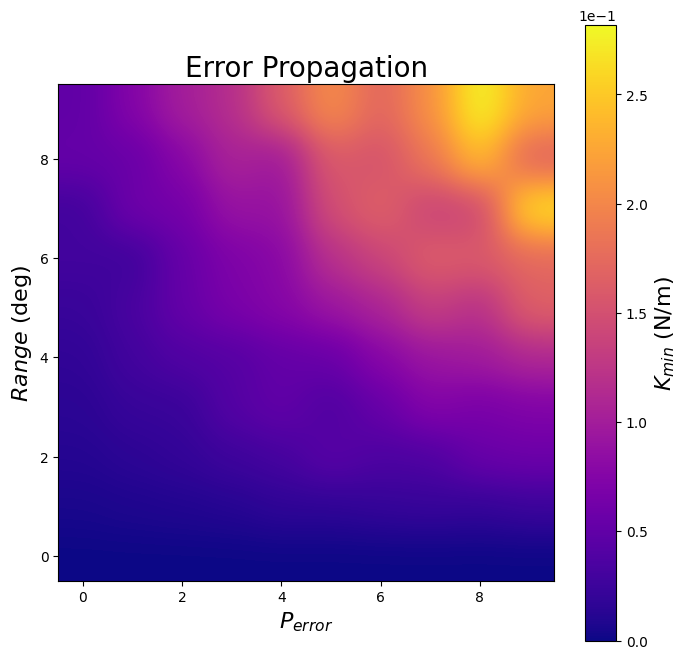

In [15]:
import matplotlib.pyplot as plt
plt.imshow(Error_out,cmap="plasma",interpolation="gaussian",origin="lower")
cb = plt.colorbar()
cb.set_label("$K_{min}$ (N/m)",fontsize=16)
cb.formatter.set_powerlimits((0, 0))
plt.xlabel("$P_{error}$",fontsize=16)
plt.ylabel("$Range$ (deg)",fontsize=16)
plt.title("Error Propagation",fontsize = 20)
fig = plt.gcf()
fig.set_size_inches((8,8))
plt.show()